In [52]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import date
from scipy.stats import multivariate_normal

In [11]:
data_ = pd.read_csv(r'C:\downloads\made2\2_ml_nikolenko\owid-covid-data.csv')

In [12]:
data_['date']  = pd.to_datetime(data_['date'])

In [13]:
date0 = pd.to_datetime("2020-03-03")

In [14]:
data = data_.loc[(data_['location'] == 'Russia') & (data_['date'] >= date0)]

In [16]:
data.loc[ data['new_cases'] ==0, 'new_cases']= 1 

In [138]:
data['total_cases_log'] = data['total_cases'].apply(math.log) 
data['new_cases_log'] = data['new_cases'].apply(math.log)
delta = data['date'] - date0
data['t'] = delta.dt.days


C:\Users\comp\AppData\Local\Temp/ipykernel_12844/1785528.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_cases_log'] = data['total_cases'].apply(math.log)
C:\Users\comp\AppData\Local\Temp/ipykernel_12844/1785528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_cases_log'] = data['new_cases'].apply(math.log)
C:\Users\comp\AppData\Local\Temp/ipykernel_12844/1785528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания).

In [18]:
data_train = data.head(50)

In [19]:
data_train

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,total_cases_log,new_cases_log
123786,RUS,Europe,Russia,2020-03-03,3.0,1.0,0.143,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,1.098612,0.000000
123787,RUS,Europe,Russia,2020-03-04,3.0,1.0,0.143,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,1.098612,0.000000
123788,RUS,Europe,Russia,2020-03-05,4.0,1.0,0.286,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,1.386294,0.000000
123789,RUS,Europe,Russia,2020-03-06,13.0,9.0,1.571,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,2.564949,2.197225
123790,RUS,Europe,Russia,2020-03-07,13.0,1.0,1.571,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,2.564949,0.000000
123791,RUS,Europe,Russia,2020-03-08,17.0,4.0,2.143,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,2.833213,1.386294
123792,RUS,Europe,Russia,2020-03-09,17.0,1.0,2.000,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,2.833213,0.000000
123793,RUS,Europe,Russia,2020-03-10,20.0,3.0,2.429,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,2.995732,1.098612
123794,RUS,Europe,Russia,2020-03-11,20.0,1.0,2.429,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,2.995732,0.000000
123795,RUS,Europe,Russia,2020-03-12,28.0,8.0,3.429,NaN,NaN,NaN,...,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN,3.332205,2.079442


In [21]:
data['date']

123786   2020-03-03
123787   2020-03-04
123788   2020-03-05
123789   2020-03-06
123790   2020-03-07
            ...    
124514   2022-03-01
124515   2022-03-02
124516   2022-03-03
124517   2022-03-04
124518   2022-03-05
Name: date, Length: 733, dtype: datetime64[ns]

In [22]:
pd.Index(data['date']).is_monotonic

True

In [23]:
data_test = data.loc[ ~data.index.isin(data_train.index)] 

In [24]:
data_test.shape

(683, 69)

In [25]:
data.shape

(733, 69)

Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

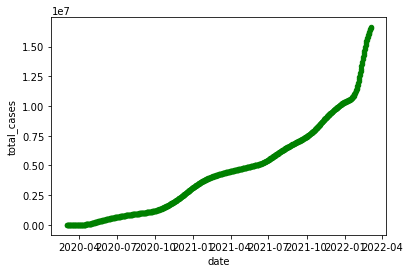

In [27]:
data.plot(kind='scatter',x='date',y='total_cases',color='green')
plt.show()

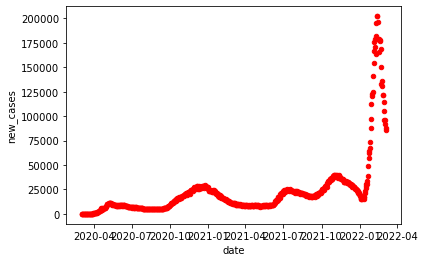

In [28]:
data.plot(kind='scatter',x='date',y='new_cases',color='red')
plt.show()

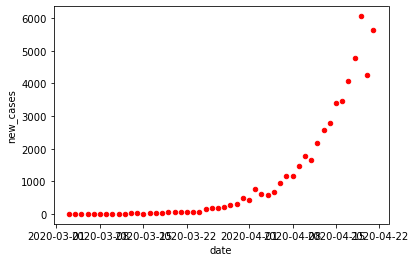

In [29]:
data_train.plot(kind='scatter',x='date',y='new_cases',color='red')
plt.show()

Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

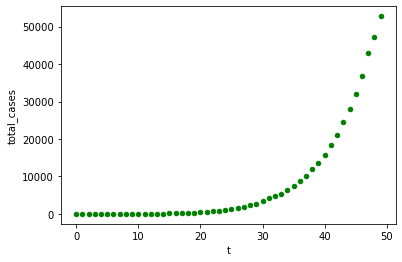

In [139]:
data_train.plot(kind='scatter',x='t',y='total_cases',color='green')
plt.show()

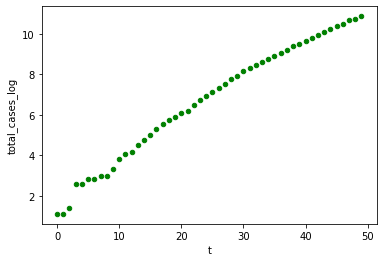

In [33]:
data_train.plot(kind='scatter',x='t',y='total_cases_log',color='green')
plt.show()

In [35]:
import numpy as np
from sklearn.linear_model import LinearRegression
X = data_train['t'].values
ln_y = data_train['total_cases_log'].values
X = X.reshape(-1, 1)
ln_y= ln_y.reshape(-1, 1)
reg = LinearRegression().fit(X, ln_y)

In [36]:
print("log regressin result a= " + str(reg.intercept_ ))

log regressin result a= [1.82073715]


In [37]:
print("log regressin result b= " + str(reg.coef_ )) 

log regressin result b= [[0.19829091]]


In [38]:
import statsmodels.api as sm
N = len(X)
p = 1 + 1  # plus one because LinearRegression adds an intercept term

X_with_intercept = np.empty(shape=(N, p), dtype=np.float)
X_with_intercept[:, 0] = 1
X_with_intercept[:, 1:p] = X
ols = sm.OLS(ln_y, X_with_intercept)
ols_result = ols.fit()
ols_result.summary()

C:\Users\comp\AppData\Local\Temp/ipykernel_12844/3272263488.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_with_intercept = np.empty(shape=(N, p), dtype=np.float)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     3226.
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           1.12e-45
Time:                        21:23:45   Log-Likelihood:                -18.319
No. Observations:                  50   AIC:                             40.64
Df Residuals:                      48   BIC:                             44.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8207      0.099     18.342      0.000       1.621       2.020
x1             0.1983      0.003     56.799      0.000       0.191       0.205
==============================================================================
Omnibus:                        6.787   Durbin-Watson:                   0.227
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                6.684
Skew:                          -0.895   Prob(JB):                       0.0354
Kurtosis:                       2.921   Cond. No.                         56.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
ln_y_pred = reg.predict(X)

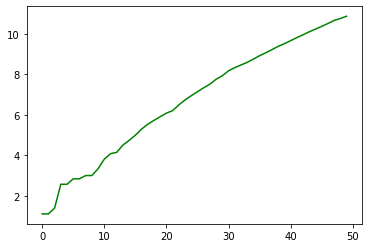

In [43]:
plt.plot(X, ln_y,color='green')
plt.show()

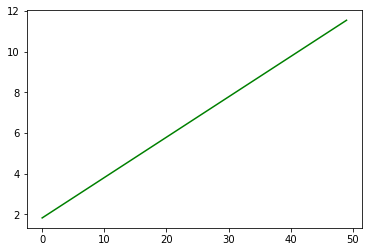

In [44]:
plt.plot(X, ln_y_pred,color='green')
plt.show()

априорное распрделение - нормальное с параметрами 
log y = a+ bt + e
a, b, e - имеет многомерное нормальное распределение



как получить оценку дисперсии - берём максимумальную апостериорную модель - а это модель максимального правдоподобия и её вид известен



Если делать с помощью нахождения апостериорного распределения и потом для оценки дисперсии шума взять оптимальную модель по методу максимума правдоподобия, то получается не очень здорово - по видимому не хватает одного шага байесовского вывода

Но чтобы всётаки проделать по предложенной схеме, то шаги следующие

Выбираем произвольно начальную матрицу ковариаций параметров и матрицу самих параметров

In [47]:
sigma_0 = np.diag((1,1))

In [48]:
mu_0 = np.array((1,1)).reshape(-1, 1)

В качестве объясняющих параметров в модели - время, берём его и добавляем единицы поскольку есть и свободный член

In [49]:
F = np.vstack((np.ones(50), X.T)).T  

Пишем функцию выдающую минус логарифм функции правдоподобия

In [50]:
def lik(a,b,sigma, mu_0, sigma_0, F, ln_y):
    if sigma == 0:
        return 100
    sigma_n = np.linalg.inv (np.linalg.inv(sigma_0) + 1/(sigma **2) * F.T @ F)
    mu_n = sigma_n @ ( np.linalg.inv(sigma_0) @ mu_0 + 1/(sigma **2) * F.T @ ln_y)
    mu_n= mu_n.reshape((1,-1))[0]
    
    rez = multivariate_normal.logpdf( (a,b) , mean=mu_n, cov=sigma_n)
     
    return  -rez

def lik2(params):
    a,b,sigma = params
    
    return lik(a,b,sigma, mu_0, sigma_0, F, ln_y)

In [59]:
from scipy import optimize

initial_guess = [5, 5, 111]
result = optimize.minimize(lik2, initial_guess, method = 'Nelder-Mead')

In [60]:
result

 final_simplex: (array([[1.82073715e+00, 1.98290912e-01, 1.76184600e-11],
       [1.82073715e+00, 1.98290912e-01, 2.25319946e-11],
       [1.82073715e+00, 1.98290912e-01, 2.74053976e-11],
       [1.82073715e+00, 1.98290912e-01, 2.92916725e-11]]), array([-53.7613229 , -53.57067651, -53.27038695, -53.24198186]))
           fun: -53.76132290339821
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 601
           nit: 326
        status: 1
       success: False
             x: array([1.82073715e+00, 1.98290912e-01, 1.76184600e-11])

По этому оптимизатору дисперсия ошибки получается очень маленькой, поэтому логичнее всё-таки оценивать её не с помощью выбора оптимального апостериорного распредления (алгоритм не сходится, но при других начальных параметрах хоть и сходился, всё равно дисперсия ошибок была слишком маленькой). Попробуем оценить диспресию ошибок из обычной линейной модели, и потом уже найденное значение подставим в оптимизатор и найдем оптимальный коэффициенты в модели

In [79]:
a_opt_classic = reg.intercept_[0] 
b_opt_classic = (reg.coef_)[0][0]
sigma_opt_empirical = np.sqrt(sum ((F @ np.array([a_opt_classic, b_opt_classic]).reshape(-1,1) - ln_y) **2)/50)[0]

In [80]:
sigma_opt_empirical

0.3490422059635658

Это значение больше похоже на правду и его будем использовать для нахождения оптимальных параметров в модели

In [90]:
def lik_empirical(a,b,sigma, mu_0, sigma_0, F, ln_y):
    if sigma == 0:
        return 100
    sigma_n = np.linalg.inv (np.linalg.inv(sigma_0) + 1/(sigma **2) * F.T @ F)
    mu_n = sigma_n @ ( np.linalg.inv(sigma_0) @ mu_0 + 1/(sigma **2) * F.T @ ln_y)
    mu_n= mu_n.reshape((1,-1))[0]
    
    rez = multivariate_normal.logpdf( (a,b) , mean=mu_n, cov=sigma_n)
     
    return  -rez

def lik2(params):
    a,b = params
    
    return lik_empirical(a,b,sigma_opt_empirical, mu_0, sigma_0, F, ln_y)

In [91]:
initial_guess = [1, 1]
result = optimize.minimize(lik2, initial_guess, method = 'Nelder-Mead')

In [92]:
result

 final_simplex: (array([[1.81284054, 0.19853324],
       [1.81277529, 0.19853455],
       [1.81287827, 0.19853134]]), array([-6.85335382, -6.85335381, -6.85335371]))
           fun: -6.853353815907827
       message: 'Optimization terminated successfully.'
          nfev: 99
           nit: 52
        status: 0
       success: True
             x: array([1.81284054, 0.19853324])

In [93]:
a_opt = result.x[0]
b_opt = result.x[0]

In [94]:
sigma_opt = sigma_opt_empirical

Находим апостериорное распределение согласно формулам

In [95]:
sigma_n = np.linalg.inv (np.linalg.inv(sigma_0) + 1/(sigma_opt **2) * F.T @ F)
mu_n = sigma_n @ ( np.linalg.inv(sigma_0) @ mu_0 + 1/(sigma_opt **2) * F.T @ ln_y)
mu_n= mu_n.reshape((1,-1))[0]

In [96]:
sigma_n

array([[ 9.37104759e-03, -2.83970283e-04],
       [-2.83970283e-04,  1.16188656e-05]])

In [97]:
def myplot_sample_lines(mu_n, sigma_n, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu_n, sigma_n, n)
    print(my_w)
    # plt.axis('equal')
    for w in my_w:
        plt.plot(X, np.exp(w[0] + w[1]*X), 'k-', lw=.4)
        #plt.plot(X,  (w[0] + w[1]*X), 'k-', lw=.4)
    plt.ylim((-3, 60000))
    #plt.ylim((0, 14))
    plt.xlim((-1, 51))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    return my_w

[[1.77593302 0.20060027]
 [1.82505652 0.19465877]
 [1.76218506 0.2004421 ]
 [1.74955912 0.20051151]
 [1.71051016 0.20131347]
 [1.80504384 0.19705795]
 [1.76193585 0.20085636]
 [1.98038336 0.19276524]
 [1.91522576 0.19540804]
 [1.79588927 0.19877437]]


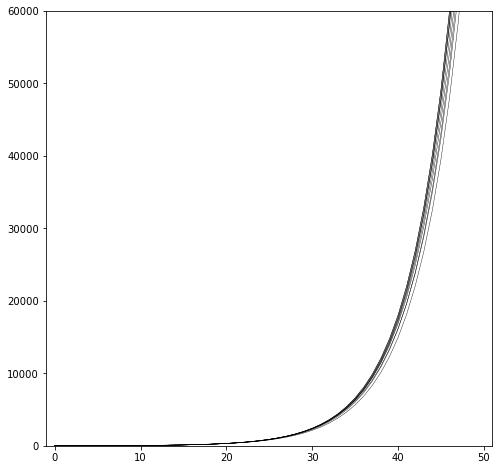

In [98]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlim((X[0], X[-1]))
ax.set_ylim((-3, 60000))
simAB = myplot_sample_lines(mu_n, sigma_n, 10)

In [99]:
dateMay1 = pd.to_datetime("2020-05-01")
dateJune1 = pd.to_datetime("2020-06-01")
dateSeptember1 = pd.to_datetime("2020-09-01")
indexMay1 =    (dateMay1 - date0).days
indexJune1 = (dateJune1 - date0).days
indexSeptember1 = (dateSeptember1 - date0).days

In [100]:
indexMay1

59

Предсказания слишком большие:

In [107]:
dateMay1_y = np.exp( a_opt + b_opt *indexMay1 )

In [108]:
dateMay1_y

1.7314048249186562e+47

In [109]:
dateJune1_y = np.exp( a_opt + b_opt *indexJune1 )

In [110]:
dateJune1_y

4.4147343824608374e+71

In [111]:
dateSeptember1_y = np.exp( a_opt + b_opt *indexSeptember1 )

In [112]:
dateSeptember1_y

1.1943065151865817e+144

In [113]:
simAB

array([[1.77593302, 0.20060027],
       [1.82505652, 0.19465877],
       [1.76218506, 0.2004421 ],
       [1.74955912, 0.20051151],
       [1.71051016, 0.20131347],
       [1.80504384, 0.19705795],
       [1.76193585, 0.20085636],
       [1.98038336, 0.19276524],
       [1.91522576, 0.19540804],
       [1.79588927, 0.19877437]])

In [126]:
def simul(dateIndex):
    simData = []
    for a, b in simAB:
        curr = np.exp( a + b *dateIndex )
        simData.append(curr)
    return simData

In [131]:
rez1 =simul(indexMay1)

In [132]:
rez1

[815330.6242355491,
 603151.7678454618,
 796728.1118482312,
 789960.3731611928,
 796517.7794676137,
 681098.991854048,
 816237.625688819,
 630036.2471602841,
 689898.600514356,
 746818.4111805945]

In [133]:
def ploo(rez1) :
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline

    np.random.seed(42)
    x = rez1

    plt.hist(x, density=True, bins=30)  # density=False would make counts
    plt.ylabel('Probability')
    plt.xlabel('Data');


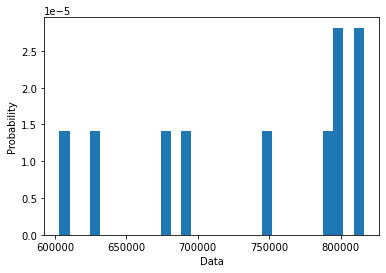

In [134]:
ploo(rez1)

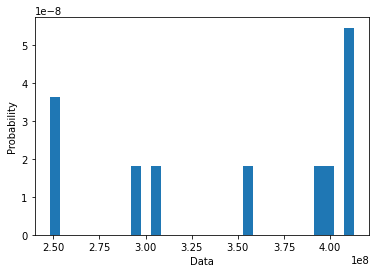

In [135]:
ploo(simul(indexJune1))

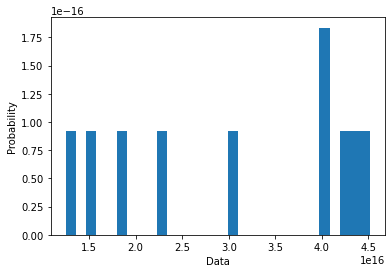

In [136]:
ploo(simul(indexSeptember1))

# Вторая часть задачи

Посколько в качестве сигмоиды выбран интеграл от плотности, то чтобы избавиться от интеграла, надо взять от него производную, и это также согласуется и имеющумися данными, поскольку дневной прирост может аппроксимировать производную.


In [ ]:
#task2_X = task2_X.reshape(-1, 1)
task2_ln_y= task2_ln_y.reshape(-1, 1)
task2_ln_yreg = LinearRegression().fit(np.array([task2_X,task2_X2]) , task2_ln_y)

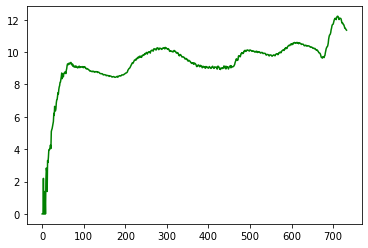

In [141]:
plt.plot(task2_X, task2_ln_y,color='green')
plt.show()

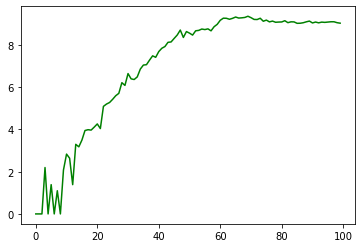

In [142]:
plt.plot(task2_X[0:100], task2_ln_y[0:100],color='green')
plt.show()

В показателе экспоненты уже может стоять квадратичная функция от времени, поэтому к матрице F из предыдущей задачи добавится столбец с квадратами времени

In [146]:
task2_F = np.vstack((np.ones(733), task2_X.T, task2_X.T**2)).T  

In [170]:
task2_X = data['t'].values
task2_X2 = task2_X **2
task2_ln_y = data['new_cases_log'].values
import statsmodels.formula.api as sm
df = pd.DataFrame({"task2_X": task2_X, "task2_X2": task2_X2, "task2_ln_y": task2_ln_y})
result = sm.ols(formula="task2_ln_y ~ task2_X + task2_X2", data=df).fit()
print(result.params)

Intercept    6.733178
task2_X      0.011617
task2_X2    -0.000009
dtype: float64


In [281]:
task2_a_opt_classic = result.params[0] 
task2_b_opt_classic = result.params[1]
task2_с_opt_classic = result.params[2] 

In [282]:
task2_sigma_opt_empirical = np.sqrt(sum ((task2_F @ np.array([task2_a_opt_classic, task2_b_opt_classic,task2_с_opt_classic ]).reshape(-1,1) - task2_ln_y) **2)/733)[0]

In [283]:
task2_sigma_opt_empirical

1.1588377111895514

Выбираем произвольно начальную матрицу ковариаций параметров и матрицу самих параметров

In [320]:
task2_sigma_0 = np.diag((1,0.0001,0.0001))

In [321]:
task2_mu_0 = np.array((6,0.011617,-0.000009)).reshape(-1, 1) 

In [322]:
task2_ln_y  = task2_ln_y.reshape(-1, 1)

In [356]:
def task2_lik_empirical(a,b,c,task2_sigma_opt_empirical, task2_mu_0, task2_sigma_0, task2_F, task2_ln_y):
 
    sigma_n = np.linalg.inv (np.linalg.inv(task2_sigma_0) + 1/(task2_sigma_opt_empirical **2) * task2_F.T @ task2_F)
    mu_n = sigma_n @ ( np.linalg.inv(task2_sigma_0) @ task2_mu_0 + 1/(task2_sigma_opt_empirical **2) * task2_F.T @ task2_ln_y)
    mu_n= mu_n.reshape((1,-1))[0]
    sigma_n = sigma_n  + 0.000000001 * np.eye(3)
    rez = multivariate_normal.logpdf( (a,b,c) , mean=mu_n, cov=sigma_n)
     
    return  -rez

def task2_lik2(params):
    a,b,c  = params
    
    return task2_lik_empirical(a,b,c,task2_sigma_opt_empirical, task2_mu_0, task2_sigma_0, task2_F, task2_ln_y)

In [357]:
task2_initial_guess = [1,1,-0.000005 ]
#task2_a, task2_b, task2_c  = task2_initial_guess

#task2_sigma = task2_initial_guess[3]
task2_result = optimize.minimize(task2_lik2, task2_initial_guess, method = 'Nelder-Mead')

In [358]:
task2_result

 final_simplex: (array([[ 6.72144373e+00,  1.16810424e-02, -9.12550484e-06],
       [ 6.72138463e+00,  1.16815339e-02, -9.15674840e-06],
       [ 6.72146032e+00,  1.16811030e-02, -9.15528887e-06],
       [ 6.72140966e+00,  1.16811318e-02, -9.15545139e-06]]), array([-17.4800483 , -17.4800481 , -17.48004805, -17.48004804]))
           fun: -17.480048297041765
       message: 'Optimization terminated successfully.'
          nfev: 313
           nit: 174
        status: 0
       success: True
             x: array([ 6.72144373e+00,  1.16810424e-02, -9.12550484e-06])

In [359]:
task2_a_opt = task2_result.x[0]
task2_b_opt =task2_result.x[1]
task2_c_opt =task2_result.x[2]
task2_sigma_opt = task2_sigma_opt_empirical

In [360]:
task2_sigma_n = np.linalg.inv (np.linalg.inv(task2_sigma_0) + 1/(task2_sigma_opt **2) * task2_F.T @ task2_F)
task2_mu_n = task2_sigma_n @ ( np.linalg.inv(task2_sigma_0) @ task2_mu_0 + 1/(task2_sigma_opt **2) * task2_F.T @ task2_ln_y)
task2_mu_n= task2_mu_n.reshape((1,-1))[0]

In [363]:
def task2_myplot_sample_lines(mu_n, sigma_n, n=20, points=None):
    # Посэмплируем и порисуем прямые
    my_w = np.random.multivariate_normal(mu_n, sigma_n, n)
    print(my_w)
    # plt.axis('equal')
    for w in my_w:
        task2_new_cases = np.exp(w[0] + w[1]*task2_X + w[2]* task2_X**2)
        task2_all_cases = np.cumsum(task2_new_cases) 
        plt.plot(task2_X, task2_all_cases , 'k-', lw=.4)
        #plt.plot(X,  (w[0] + w[1]*X), 'k-', lw=.4)
    plt.ylim((-3, 60000))
    #plt.ylim((0, 14))
    plt.xlim((-1, 51))
    if not points is None:
        plt.scatter(points[0], points[1], marker='*', s=200)
    return my_w

[[ 6.62117016e+00  1.25957911e-02 -1.01323420e-05]
 [ 6.89904271e+00  1.04754177e-02 -7.23654246e-06]
 [ 6.84692463e+00  1.12261785e-02 -8.72889451e-06]
 [ 6.78520787e+00  1.19609705e-02 -9.79664748e-06]
 [ 6.85601649e+00  1.07558219e-02 -8.13632156e-06]
 [ 6.52500393e+00  1.30690356e-02 -1.09489932e-05]
 [ 6.61832160e+00  1.27414054e-02 -1.05817076e-05]
 [ 6.55577161e+00  1.32348170e-02 -1.12370545e-05]
 [ 6.68847212e+00  1.15445258e-02 -9.01846063e-06]
 [ 6.88872878e+00  1.05579151e-02 -7.68315403e-06]]


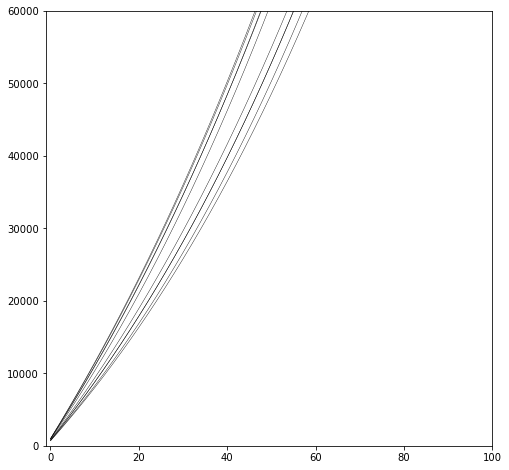

In [364]:
task2_fig = plt.figure(figsize=(8, 8))
ax = task2_fig.add_subplot(111)
ax.set_xlim((task2_X[0], task2_X[-1]))
ax.set_ylim((-3, 60000))
task2_simABC = task2_myplot_sample_lines(task2_mu_n, task2_sigma_n, 10)